# CloudWalk - Monitoring Analyst Test

**First challenge**

- Analysis of hypothetical checkout data from two different days of a POS.

## Install requirements

In [1]:
!pip install ipython-sql

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

## Connect to database

In [3]:
dbEngine = create_engine("sqlite:///monitoring_test.db")

In [4]:
dbEngine

Engine(sqlite:///monitoring_test.db)

In [5]:
%load_ext sql

In [6]:
%sql sqlite:///monitoring_test.db

## Create new joined table

In [7]:
%%sql
CREATE TABLE joined_table AS
SELECT
    checkout_2.time,
	checkout_2.today,
	checkout_2.yesterday,
	checkout_1.yesterday AS 'yesterday+1d',
	checkout_2.same_day_last_week,
	checkout_1.same_day_last_week AS 'same_day_last_week+1d'
FROM checkout_1
JOIN checkout_2 ON checkout_1.today = checkout_2.yesterday AND checkout_1.time = checkout_2.time;

 * sqlite:///monitoring_test.db
(sqlite3.OperationalError) table joined_table already exists
[SQL: CREATE TABLE joined_table AS
SELECT
    checkout_2.time,
	checkout_2.today,
	checkout_2.yesterday,
	checkout_1.yesterday AS 'yesterday+1d',
	checkout_2.same_day_last_week,
	checkout_1.same_day_last_week AS 'same_day_last_week+1d'
FROM checkout_1
JOIN checkout_2 ON checkout_1.today = checkout_2.yesterday AND checkout_1.time = checkout_2.time;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [8]:
%%sql
SELECT * FROM joined_table

 * sqlite:///monitoring_test.db
Done.


time,today,yesterday,yesterday+1,same_day_last_week,same_day_last_week+1
00h,6,9,12,5,11
01h,3,3,5,2,1
02h,3,1,0,2,0
03h,0,1,0,1,0
04h,0,0,0,0,1
05h,2,1,1,1,2
06h,3,1,1,2,5
07h,10,2,3,9,9
08h,25,0,1,12,18
09h,36,2,9,27,30


## Create dataframe from table

In [9]:
df = pd.read_sql_query('SELECT * FROM joined_table', dbEngine)
df.head(4)

,time,today,yesterday,yesterday+1,same_day_last_week,same_day_last_week+1
0,00h,6,9,12,5,11
1,01h,3,3,5,2,1
2,02h,3,1,0,2,0
3,03h,0,1,0,1,0


## Create multiple lines plot

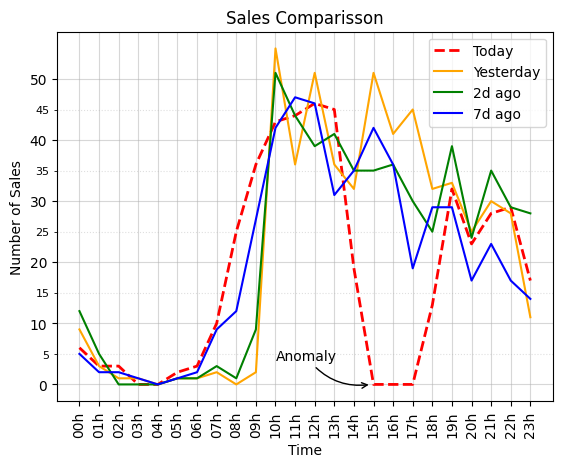

In [13]:
fig, ax = plt.subplots()

ax.plot(df['time'], df['today'], label='Today', color='red', linestyle = '--', linewidth=2)
ax.plot(df['time'], df['yesterday'], label='Yesterday', color='orange')
ax.plot(df['time'], df['yesterday+1'], label='2d ago', color='green')
ax.plot(df['time'], df['same_day_last_week'], label='7d ago', color='blue')

df_max_value = df.max(numeric_only=True).max()              
minor_ticks = np.arange(0,df_max_value, 5)
ax.set_yticks(minor_ticks, minor=True,labels=minor_ticks,fontsize=8)
ax.grid(visible=True, which='minor', linestyle=':', alpha=0.4)
ax.grid(visible=True, which='major', linestyle='-', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.title('Sales Comparisson')

plt.legend()
plt.setp(ax.get_xticklabels(), rotation=90, ha="center")

ax.annotate('Anomaly', xy=(14.9,0), xytext=(10,4), arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.3'))

plt.show()